# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import ndimage #era la mas usada antes de sklean, vamos a compararlos
# esta es la matriz de distancia, similar a la de textura
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix

from sklearn import manifold,datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs


# Generación de la data

* Crear data

In [ ]:
#Genero 2 features, y centroides
X1, y1 = make_blobs(n_samples=50, centers = [[4,4], [-2,-1], [1,1], [10,4]], cluster_std=0.9)

* Grafico

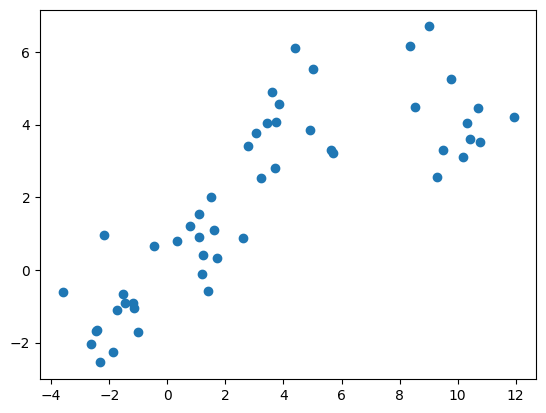

In [ ]:
plt.scatter(X1[:, 0], X1[:, 1], marker='o')

# Entrenamiento

## Entrenemos con algoritmo de entrenamiento alogmerativo, Veo quiene sta cerca a mi y hacemos equipo entre los dos. Como peleptizacion en aceros (Ciencia de amteriales)

* Creo modelo / lo intancio

In [ ]:
#n_init es la seminlla
agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')

*  Entreno

In [ ]:
agglom.fit(X1, y1)

AgglomerativeClustering(linkage='average', n_clusters=4)

## Verifiquemos el resultado del clustering

* Grafiquemos los centroides y sus labels



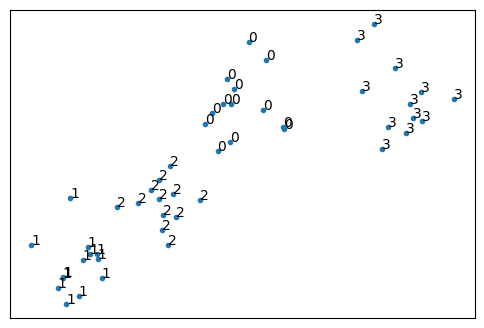

In [ ]:
plt.figure(figsize=(6,4))

x_min, x_max = np.min(X1, axis =0), np.max(X1, axis=0) #Escalamos los datos, ya que algunos son dispersos
x1 = (X1 - x_min) / (x_max - x_min)#quitamos valor minimo y dividimnos entre el range, esto solo para mostarlos


for i in range(X1.shape[0]):
  plt.text(X1[i,0], X1[i,1], str(y1[i])),
  color = plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
  fontdict = {'weight' : ' bold', 'size':9}
  

#meove axis ticks
plt.xticks([])
plt.yticks([])
plt.scatter(X1[:,0], X1[:,1],marker= '.')
plt.show()

* Calculemos la materiz de distancais (distancia de cad punto con el resto

In [ ]:
dist_matrix = distance_matrix(X1,X1)
print(dist_matrix)

[[ 0.          6.98393116  6.13979396 ...  0.51511178  6.69975709
   5.40435536]
 [ 6.98393116  0.          1.23396668 ...  6.8532729   0.92146211
  11.80489639]
 [ 6.13979396  1.23396668  0.         ...  5.94359856  1.78953761
  11.20927626]
 ...
 [ 0.51511178  6.8532729   5.94359856 ...  0.          6.6351121
   5.82073392]
 [ 6.69975709  0.92146211  1.78953761 ...  6.6351121   0.
  11.27362654]
 [ 5.40435536 11.80489639 11.20927626 ...  5.82073392 11.27362654
   0.        ]]


* En variable Z, veo si puego hacer alguna otra agruapcion usando esta dis_matrix como linakge

In [ ]:
Z = hierarchy.linkage(dist_matrix, 'complete')

<ipython-input-27-3814b774a052>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'complete')


* Dendograma

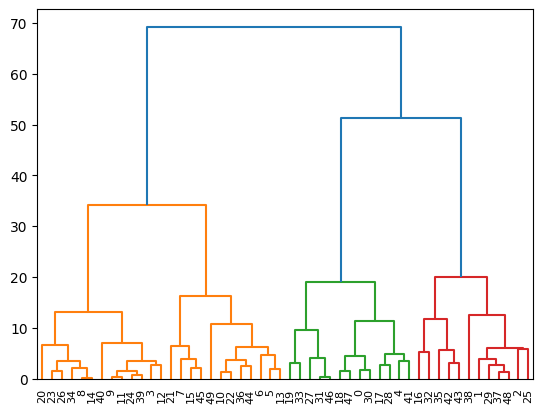

In [ ]:
dendro = hierarchy.dendrogram(Z)

# veo que 4, 3 o 2 clsuters es lo que mas se ajusta

* Otro dendograma pero ahora con la media

<ipython-input-31-90bcb3750f27>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = hierarchy.linkage(dist_matrix, 'average')


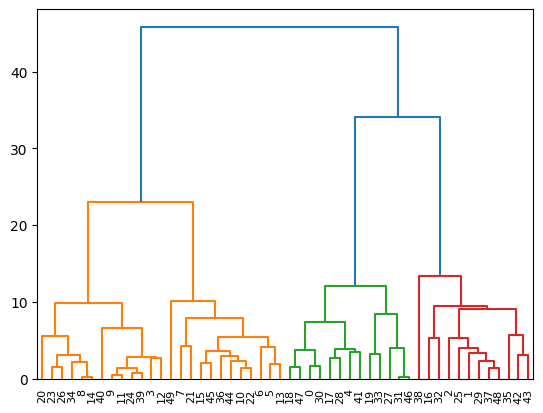

In [ ]:
Z = hierarchy.linkage(dist_matrix, 'average')
dendro = hierarchy.dendrogram(Z)

# Hagamos una aplicación práctica (segmentación de clientes), PR. de que cliente pague o no sus deudas. Tengo copias de respaldo, para tras la clsuterización interpretar la data, porque al preprocesar cambian cositas en features

## Traigamos la data

* Path

In [ ]:
path = "/content/drive/MyDrive/Colab Notebooks/CienciaDeDatos/03_Clustering/Cust_Segmentation.csv"

* Leo como DF

In [ ]:
cust_df = pd.read_csv(path)

* Análisis basiquito

In [ ]:
cust_df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


## Preprocesamiento

* Elimienos features en una copia del Df

In [ ]:
df = cust_df.drop('Address', axis=1)

* Normalización

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df.values[:,1:] #todas las observaciones, pero de features del 1 al ultimo, no tomo el 0 (Id)
X = np.nan_to_num(X) # Replace NaN with zero and infinity with large finite numbers

In [ ]:
# normalizo
Clus_dataSet = StandardScaler().fit_transform(X)
Clus_dataSet

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.52379654, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.52379654,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.90913822,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.90913822,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.52379654, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.52379654, -0.2340332 ]])

## Entrenamiento

* Creo modelo

In [ ]:
clusterNum = 3
k_means = KMeans(init='k-means++', n_clusters = clusterNum, n_init=12)

* Entreno

In [ ]:
k_means.fit(X)

KMeans(n_clusters=3, n_init=12)

* Saco labels/clusters sacados

In [ ]:
labels = k_means.labels_
#labels

* Creo nuevo fature en DF con los labels, y lo pongo en el DF 'orignial', el no alterado. Por elllo hice copias

In [ ]:
df['Clus_km'] = labels
df.head(3)

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Clus_km
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,1


## Interpretación (Con todo el EDA que he aprendido)

* Media de todos los datos, 'hue' by su cluster 

In [ ]:
df.groupby('Clus_km').mean()

#Encontramos que por ejemplo, cluster 1 tiene menor nivel education, 
# menos ganancias, etc

# 0 mayores, y ganan rsto, más educación
# 1 un poco menos grandes, no ganan tanto como 0 y menos educacion

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
Clus_km,,,,,,,,,
0,410.166667,45.388889,2.666667,19.555556,227.166667,5.678444,10.907167,0.285714,7.322222
1,432.006154,32.967692,1.613846,6.389231,31.204615,1.032711,2.108345,0.284658,10.095385
2,403.780220,41.368132,1.961538,15.252747,84.076923,3.114412,5.770352,0.172414,10.725824


* Gráfica de dispersión de Edada vs Ingresos

<ipython-input-45-e1b727868d1b>:3: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  plt.scatter(X[:,0], X[:,3], s=area, c=labels.astype(np.float), alpha=0.5)


Text(0, 0.5, 'Income')

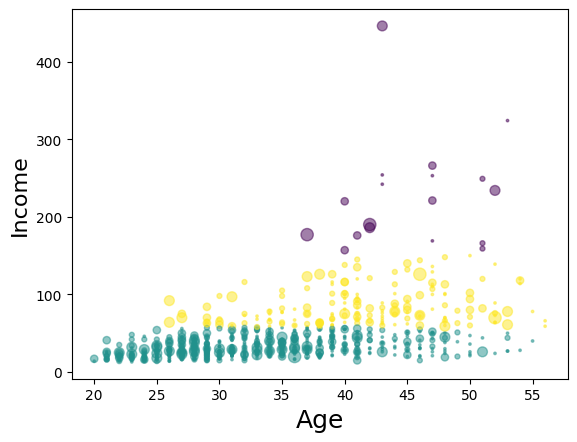

In [ ]:
area = np.pi * (X[:,1]) **2

#el tamaño de los puntos, s, lo define el ara para cada punto por la edad
#color por cluster
plt.scatter(X[:,0], X[:,3], s=area, c=labels.astype(np.float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)


#Con sto segmentaria las empresas, bucarian personas de mas de 35 aÑos, porque gnan mas

* Grafica de dispersion 3D edad, eduacion y gangancias

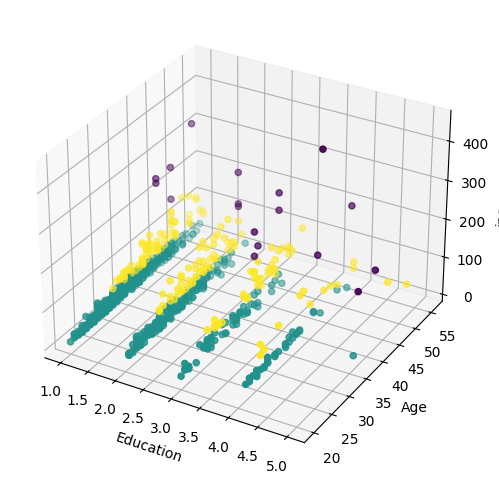

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1,figsize=(8,6))
plt.clf() #limpio dfigura

#ax = fig.Axes3D(fig,rect=[0,0,.95,1], elev=48,azim=134)
ax = fig.add_subplot(111,projection='3d') #agrego subplot

plt.cla()
# plt.xlabel('Education',fontsize=18)
# plt.ylabel('Age',fontsize=16)
# plt.zlabel('income',fontsize=16)
ax.set_xlabel('Education')
ax.set_ylabel('Age')
ax.set_zlabel('income')

ax.scatter(X[:,1], X[:,0], X[:,3], c=labels.astype(float))
plt.show()

#mas educacion, mas edad, mas plata